# 2 NeuralNetworkによる量子力学的調和振動子問題の解 (実装編)
## 2-1 Simple model

### 2-1-1 Configuration

<br>
\begin{align*}
a_{\text{out}}(x)=\hat{W}^{(2)}f\left(
\hat{W}^{(1)}\vec{x}+\vec{b}
\right)=
w_3\cdot f(w_1x+w_5)+w_4\cdot f(w_2x+w_6)
\qquad \qquad \phi(\boldsymbol{w},x)=\exp\left\{a_{\text{out}}(x)\right\}
\end{align*}

<br><br>
\begin{align*}
  \hat{W}^{(1)} = \left(
    \begin{array}{c}
        w_1 \\
        w_2
    \end{array}
  \right)\qquad
    \hat{W}^{(2)} = \left(
        w_3,\ w_4
  \right)\qquad
   \vec{b} = \left(
    \begin{array}{c}
        w_5 \\
        w_6
    \end{array}
  \right)\qquad
  \boldsymbol{w}=(w_1,w_2,\cdots,w_6)
 \end{align*}

### 2-1-2 work flow
>1. $\boldsymbol{w}$を初期化
<br>
2. $\phi(\boldsymbol{w},x)$を計算
<br>
3. エネルギー期待値の算出
<br><br>
\begin{align*}
\langle \hat{H} \rangle = \frac{1}{Z}\int \phi(\boldsymbol{w},x)\hat{H}\phi(\boldsymbol{w},x)\, dx\qquad Z=\int |\phi(\boldsymbol{w},x)|^2\,dx\qquad \hat{H}=-\frac{\hbar^2}{2m}\frac{d^2}{dx^2}+\frac{1}{2}m\tilde{\omega}^2x^2
\end{align*}
<br>
4. パラメータ更新用勾配の算出
<br><br>
\begin{align*}
\frac{\partial \langle \hat{H} \rangle}{\partial w_k}=2\langle \theta_k \hat{H}\rangle - 2\langle \theta_k \rangle \langle \hat{H}\rangle\qquad\qquad \theta_k = \frac{\partial a_{\text{out}}}{\partial w_k}
\end{align*}
<br>
5. SGD(確率勾配降下法)によるパラメータ最適化
<br><br>
\begin{align*}
\boldsymbol{w}^{\text{new}}=\boldsymbol{w}^{(\text{old})}-\alpha \frac{\partial \langle \hat{H} \rangle}{\partial \boldsymbol{w}}
\end{align*}
<br><br>
以上2~3のステップを繰り返す

## 2-1-3 class

- `__init__`: パラメータ初期化


- `get_params`: 各層の行列をベクトル化$\hat{W}^{(1)},\,\hat{W}^{(2)}\rightarrow \boldsymbol{w}$


- `set_params`: ベクトル化されたパラメータを行列形式に戻す$\boldsymbol{w}\rightarrow\hat{W}^{(1)},\,\hat{W}^{(2)}$


- `act_func`: 活性化関数$f(x)$の定義


- `phi`: $\phi(\boldsymbol{w},x)$の計算


- `get_norm`: $Z=\int \phi^2(x)\ dx$の計算


- `get_average`: 期待値算出 $\langle\cdots\rangle=\frac{1}{Z}\int \phi(x)[\cdots]\phi(x)\,dx$


- `_hamiltonian_operate`: $\langle \hat{H}\times(\cdots)\rangle$の演算


- `_calc_grad`: 勾配計算


- `update`:SGDによるパラメータ更新

## 2-2 Demonstration
### 2-2-1 python coding
- for文

```for (変数) in [イテレータ]: 
    (繰り返す処理)
```

In [1]:
for x in [3,9,-1]:
    print(x)

3
9
-1


In [2]:
for x in range(5):
    print(x)

0
1
2
3
4


- if文

`if (条件式): 処理`

In [3]:
def is_even(x):
    if x % 2 == 0:
        print(x)

In [4]:
is_even(2)

2


In [5]:
is_even(5)

- lambda式

In [6]:
f = lambda x: x ** 2

In [7]:
f(3)

9

- integrate 

In [8]:
from scipy import integrate
integrate.quad(f, 0, 1)

(0.33333333333333337, 3.700743415417189e-15)

- ravel $\to$1次元化

In [9]:
import numpy as np
A = np.arange(9).reshape(3,3)

In [10]:
A

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [11]:
A.ravel()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

### 2-2-2 implementation

In [12]:
import sys
sys.path.append('..') # この文はパスの設定なので気にしない
from classes.wave_function_class import WaveFunction

- インスタンス生成

In [13]:
model = WaveFunction()
model.W1 #パラメータ確認

array([[0.8457843 ],
       [0.70835471]])

In [14]:
model.W2

array([[0.5520996 , 0.27100626]])

In [15]:
model.get_params()#1次元化されたパラメータ取得

array([0.8457843 , 0.70835471, 0.5520996 , 0.27100626, 1.        ,
       1.        ])

- パラメータセッティング

In [16]:
model.set_params([1,2,3,4,5,6])

In [17]:
model.W1

array([[1],
       [2]])

In [18]:
model.W2

array([[3, 4]])

- 活性化関数の確認

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
x = np.linspace(-5, 5, 100)# -5から5まで100分割

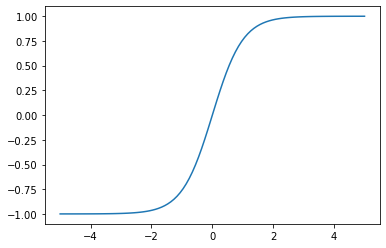

In [21]:
plt.plot(x, model.act_func(x))

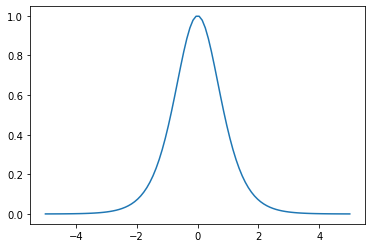

In [22]:
plt.plot(x, model.act_func(x, deriv=True))

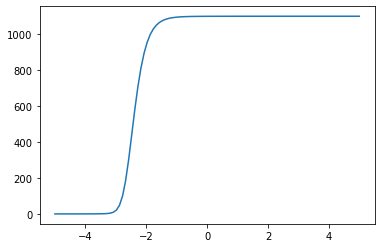

In [23]:
plt.plot(x,model.phi(x))

- 規格化因子$Z$の計算確認

In [24]:
model.get_norm()

8603605.75671696

- 期待値計算部のテスト

In [25]:
model.get_average(lambda x:x)

1.4139795585764967

- ハミルトニアン期待値

In [26]:
model._hamiltonian_operate(lambda x:1)

3.2228960086908542

- 勾配計算チェック

In [27]:
model._calc_grad()

array([ 0.01127831,  0.13349091,  0.00123349,  0.00898712, -0.00737709,
       -0.05492862])